In [ ]:
pip install eemont

In [2]:
import eemont
import ee
import geemap

In [3]:
# 1. Authenticate and Initialize Earth Engine
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-jessebuyungo113')

print("Google Earth Engine initialized.")

Google Earth Engine initialized.


In [4]:
# get area of intreset shapefile
asset_id = 'projects/ee-jessebuyungo113/assets/rwimi'
aoi= ee.FeatureCollection(asset_id )
print("Succes")

Succes


In [5]:
# landsat 7 image collections
#2002 -2014
L7 = (ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
      .filterBounds(aoi)
      .filterDate('2002-01-01','2014-01-31')
      .preprocess()
      .spectralIndices(['NDVI']))

#landsat 5 image collections
#2002 -2014
L5 = (ee.ImageCollection('LANDSAT/LT05/C02/T1_L2')
      .filterBounds(aoi)
      .filterDate('2002-01-01','2014-01-31')
      .preprocess()
      .spectralIndices(['NDVI']))

#landsat 8 image collections
#2013 - 2022
L8 = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
      .filterBounds(aoi)
      .filterDate('2014-01-01','2022-01-31')
      .preprocess()
      .spectralIndices(['NDVI']))

#sentinel 2 image collections
#2013 - 2022
S2 = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
      .filterBounds(aoi)
      .filterDate('2014-01-01','2022-01-31')
      .preprocess()
      .spectralIndices(['NDVI']))



In [6]:
#function to extract  timeseries NDVI
def time_ndvi(image_collection):


  ts = image_collection.getTimeSeriesByRegion(geometry = aoi,
                                bands = ['NDVI'],
                                reducer = [ee.Reducer.mean()],
                                scale = 30,
                                dateFormat = 'YYYYMMdd')
  tsPandas = geemap.ee_to_df(ts)
  tsPandas['date'] = pd.to_datetime(tsPandas['date'], format='%Y%m%d')
  tsPandas = tsPandas[tsPandas['NDVI'] != -9999]
  tsPandas = tsPandas.sort_values(by='date')
  tsPandas = tsPandas.drop(columns=['reducer'])
  return tsPandas



In [13]:
import pandas as pd

In [14]:
#function to extract  timeseries NDVI
def time_ndvi(image_collection):


  ts = image_collection.getTimeSeriesByRegion(geometry = aoi,
                                bands = ['NDVI'],
                                reducer = [ee.Reducer.mean()],
                                scale = 30,
                                dateFormat = 'YYYYMMdd')
  tsPandas = geemap.ee_to_df(ts)
  tsPandas['date'] = pd.to_datetime(tsPandas['date'], format='%Y%m%d')
  tsPandas = tsPandas[tsPandas['NDVI'] != -9999]
  tsPandas = tsPandas.sort_values(by='date')
  tsPandas = tsPandas.drop(columns=['reducer'])
  return tsPandas



In [16]:
l_5 = time_ndvi(L5)
l_8 = time_ndvi(L8)
l_7 = time_ndvi(L7)
s_2 = time_ndvi(S2)


In [17]:
combined_df = pd.concat([l_5, l_7,])

combined_df = combined_df.sort_values(by='date')
len(combined_df )

121

In [19]:
import matplotlib.pyplot as plt


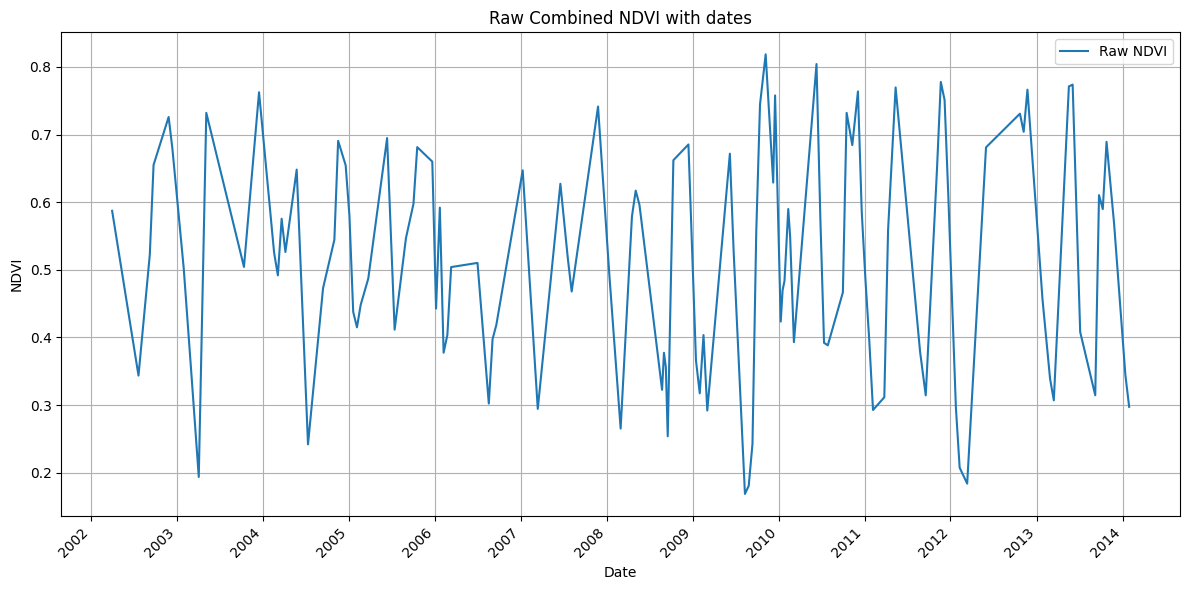

In [28]:

import matplotlib.dates as mdates # Import mdates here

x1 = combined_df['date']
x2 = combined_df['NDVI']

plt.figure(figsize=(12, 6))
plt.plot(x1, x2, label='Raw NDVI')

plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Raw Combined NDVI with dates')
plt.grid(True)
plt.legend()

# Format the x-axis to show yearly ticks
ax = plt.gca()
formatter = mdates.DateFormatter('%Y') # Format as Year
locator = mdates.YearLocator() # Locate ticks at the start of each year

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

plt.show()




In [30]:
combined_df.to_csv('combined_ndvi_timeseries.csv', index=False)
print("DataFrame exported to combined_ndvi_timeseries.csv in your working directory.")

DataFrame exported to combined_ndvi_timeseries.csv in your working directory.


,NDVI,date
0,0.587209,2002-04-02
1,0.343599,2002-07-23
2,0.522270,2002-09-09
3,0.654978,2002-09-25
4,0.725925,2002-11-28
